[View in Colaboratory](https://colab.research.google.com/github/huudatHust/machine-learning/blob/master/1_Linear_Regression.ipynb)

# **Bài toán Hồi Quy -  Linear Regression**

---
# Vấn đề :
https://machinelearningcoban.com/2016/12/28/linearregression/


một căn nhà rộng x1 m2, có x2  phòng ngủ và cách trung tâm thành phố x3 km,  có giá là bao nhiêu??
Giả sử chúng ta đã có số liệu thống kê từ 1000 căn nhà trong thành phố đó, liệu rằng khi có một căn nhà mới với các thông số về diện tích, số phòng ngủ và khoảng cách tới trung tâm, chúng ta có thể dự đoán được giá của căn nhà đó không?




y
≈
f
(
x
)
=
^
y


f
(
x
)
=
w
1
x
1
+
w
2
x
2
+
w
3
x
3
+
w
0
 
 
 
trong đó, 
w
1
,
w
2
,
w
3
,
w
0
 là các hằng số, 
w
0
 còn được gọi là bias. Mối quan hệ 
y
≈
f
(
x
)
 bên trên là một mối quan hệ tuyến tính (linear). Bài toán chúng ta đang làm là một bài toán thuộc loại regression. Bài toán đi tìm các hệ số tối ưu 
{
w
1
,
w
2
,
w
3
,
w
0
}
 chính vì vậy được gọi là bài toán Linear Regression.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

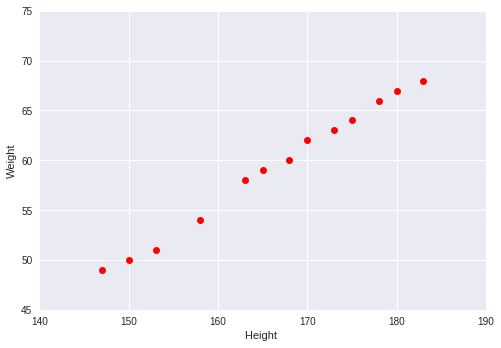

In [8]:
#height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
#weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

#visaulize data
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height ')
plt.ylabel('Weight')
plt.show()

Từ đồ thị này ta thấy rằng dữ liệu được sắp xếp gần như theo 1 đường thẳng, vậy mô hình Linear Regression nhiều khả năng sẽ cho kết quả tốt:

(cân nặng) = w_1*(chiều cao) + w_0

In [11]:
#Build XBar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)


[[  1. 147.]
 [  1. 150.]
 [  1. 153.]
 [  1. 158.]
 [  1. 163.]
 [  1. 165.]
 [  1. 168.]
 [  1. 170.]
 [  1. 173.]
 [  1. 175.]
 [  1. 178.]
 [  1. 180.]
 [  1. 183.]]


NGhiệm pt : w
=
A
†
b
=
(
¯
X
T
¯
X
)
†
¯
X
T
y
 
 
 
(
5
)


In [16]:
#Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w);

w =  [[-33.73541021]
 [  0.55920496]]


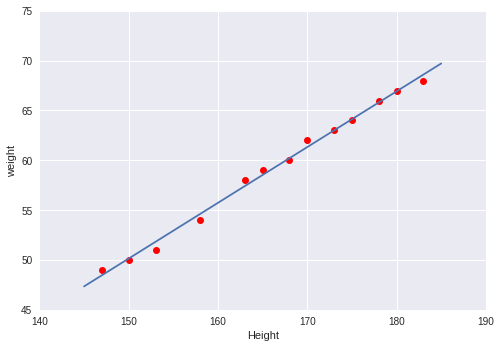

In [17]:
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1 * x0

#drawing the fitting line
plt.plot(X.T, y.T, 'ro')
plt.plot(x0, y0)
plt.axis([140, 190, 45, 75])
plt.xlabel('Height')
plt.ylabel('weight')
plt.show()

In [18]:
#predict
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print( u'Predict weight of person with height 155 cm: %.2f (kg), real number: 52 (kg)'  %(y1) )
print( u'Predict weight of person with height 160 cm: %.2f (kg), real number: 56 (kg)'  %(y2) )

Predict weight of person with height 155 cm: 52.94 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 55.74 (kg), real number: 56 (kg)


In [19]:
from sklearn import datasets, linear_model

#fit the model by liear regression
regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(Xbar, y)
# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Solution found by (5): ', w.T)

Solution found by scikit-learn  :  [[-33.73541021   0.55920496]]
Solution found by (5):  [[-33.73541021   0.55920496]]
